In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
recipes=pd.read_csv('/Users/biruwu/Desktop/recipes_muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


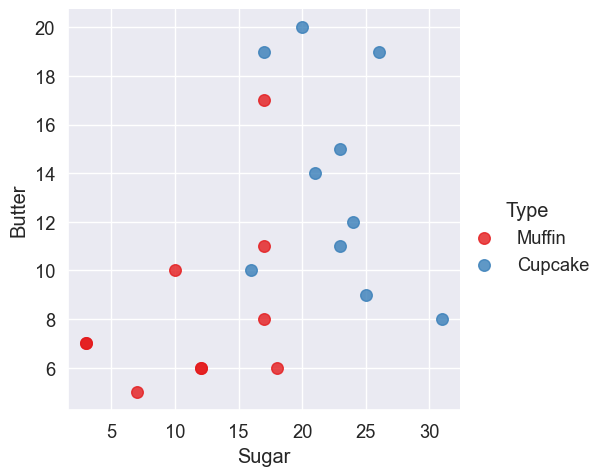

In [3]:
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [5]:
suger_butter=recipes[['Sugar','Butter']].to_numpy()
type_label=np.where(recipes['Type']=='Muffin',0,1)

In [6]:
model=svm.SVC(kernel='linear',C=2**-5)

In [7]:
model.fit(suger_butter,type_label)

SVC(C=0.03125, kernel='linear')

In [8]:
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(5,30)
yy=a*xx-(model.intercept_[0]/w[1])

In [9]:
b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

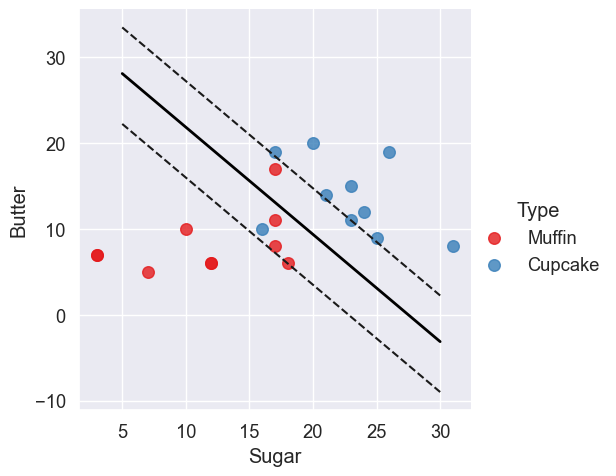

In [10]:
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],
            s=80,facecolors='none')

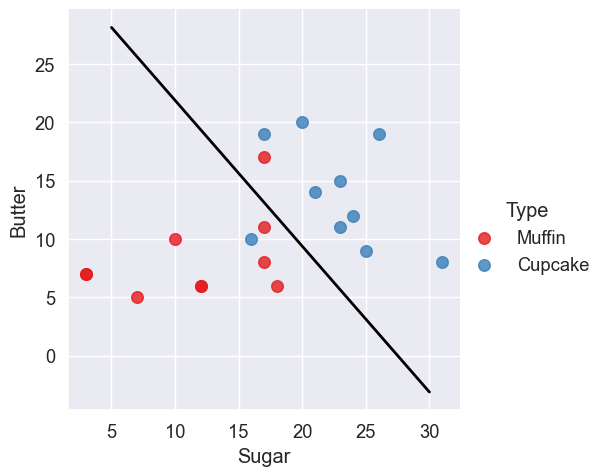

In [11]:
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')

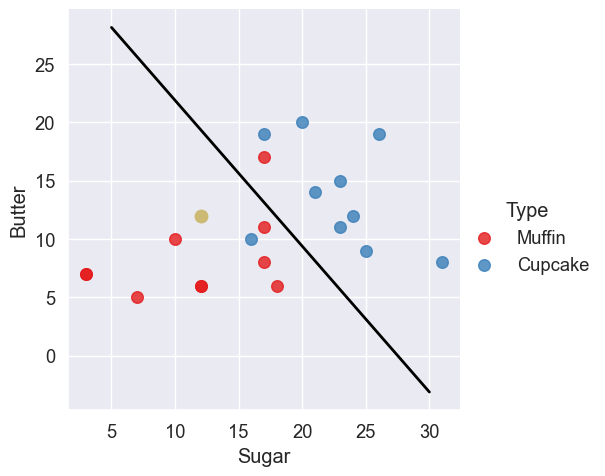

In [12]:
sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(12,12,'yo',markersize='9')

In [13]:
def muffin_or_cupcake(butter, sugar):
    if(model.predict([[butter,sugar]]))== 0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [14]:
muffin_or_cupcake(12,12)

You're looking at a muffin recipe!


In [29]:
sugar_butter = recipes[['Sugar', 'Butter']]
type_label = recipes['Type']
model.fit(sugar_butter, type_label)

SVC(kernel='linear')

In [30]:
model=svm.SVC(kernel= 'linear' ,decision_function_shape='ovr')
model.fit(sugar_butter,type_label)

SVC(kernel='linear')

In [31]:
model=svm.SVC(kernel='rbf',C=1,gamma=2**-5)
model.fit(sugar_butter,type_label)

SVC(C=1, gamma=0.03125)